# **Tensor Basics**

In [37]:
import torch
torch.__version__

'2.0.1+cu118'

In [38]:
x = torch.empty(1) # scalar
print(x)

tensor([-3.8156e-36])


In [39]:
x = torch.empty(3) # vector, 1D
print(x)

tensor([9.5796e-35, 0.0000e+00, 9.9197e-35])


In [40]:
x = torch.empty(2,3) # matrix, 2D
print(x)

tensor([[-3.8156e-36,  4.5752e-41,  9.9315e-35],
        [ 0.0000e+00,  4.4842e-44,  0.0000e+00]])


In [41]:
x = torch.empty(2,2,3) # tensor, 3 dimensions
print(x)

tensor([[[9.9193e-35, 0.0000e+00, 9.9311e-35],
         [0.0000e+00, 1.1210e-43, 0.0000e+00]],

        [[1.5695e-43, 0.0000e+00, 9.5888e-35],
         [0.0000e+00, 1.7748e+28, 1.8176e+31]]])


In [42]:
x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print(x)

tensor([[[[2.6252e-09, 6.6347e-10, 1.4580e-19],
          [1.1495e+24, 3.0881e+29, 1.5766e-19]],

         [[7.3313e+22, 7.2151e+22, 2.8404e+29],
          [2.3089e-12, 1.9421e+31, 2.7491e+20]]],


        [[[6.1949e-04, 1.9421e+31, 2.7491e+20],
          [2.3078e-12, 7.1760e+22, 7.2250e+28]],

         [[1.5766e-19, 1.3423e-05, 1.3015e+22],
          [4.2957e-05, 2.6705e+23, 1.7279e-04]]]])


In [43]:
# torch.rand(size): random numbers [0, 1]
x = torch.rand(5, 3)
print(x)

tensor([[0.7297, 0.2530, 0.3744],
        [0.2580, 0.1643, 0.8890],
        [0.5815, 0.8750, 0.6449],
        [0.1386, 0.0597, 0.0096],
        [0.5770, 0.2643, 0.7565]])


In [44]:
# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print(x)


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [45]:
# check size
print(x.size())

# check data type
print(x.dtype)

torch.Size([5, 3])
torch.float32


In [46]:
# specify types, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [47]:
# construct from data
x = torch.tensor([5.5, 3])
print(x.size())

torch.Size([2])


In [48]:
# requires_grad argument
x = torch.tensor([5.5, 3], requires_grad=True)

In [49]:
# Operations
y = torch.rand(2, 2)
x = torch.rand(2, 2)

In [50]:
# elementwise addition
z = x + y
torch.add(x,y)


tensor([[0.7739, 1.0842],
        [1.8768, 1.6576]])

In [51]:
# substraction
z = x - y
z = torch.sub(x, y)

In [52]:
# multiplication
z = x * y
z = torch.mul(x,y)


In [53]:
# division
z = x / y
z = torch.div(x,y)

In [54]:
# Slicing
x = torch.rand(5,3)
print(x)
print(x[:, 0]) # all rows, column 0
print(x[1, :]) # row 1, all columns
print(x[1,1]) # element at 1, 1

tensor([[0.4227, 0.5196, 0.4287],
        [0.0104, 0.8766, 0.2848],
        [0.2619, 0.4143, 0.9247],
        [0.4751, 0.1902, 0.7676],
        [0.3895, 0.5428, 0.0552]])
tensor([0.4227, 0.0104, 0.2619, 0.4751, 0.3895])
tensor([0.0104, 0.8766, 0.2848])
tensor(0.8766)


In [55]:
# Get the actual value if only 1 element in your tensor
print(x[1,1].item())

0.87663334608078


In [56]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
# if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())


torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [57]:
# Converting a Torch Tensor to a NumPy array and vice versa is very easy
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [58]:
# numpy to torch
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


# **Autograd**

In [66]:
import torch

In [67]:
# requires_grad = True -> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

In [68]:
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)


tensor([0.0808, 1.0481, 2.0131], requires_grad=True)
tensor([2.0808, 3.0481, 4.0131], grad_fn=<AddBackward0>)


In [69]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([12.9895, 27.8719, 48.3147], grad_fn=<MulBackward0>)
tensor(29.7254, grad_fn=<MeanBackward0>)


In [70]:
z.backward()
print(x.grad) # dz/dx

tensor([4.1616, 6.0961, 8.0262])


In [71]:
# Model with non-scalar output:
x = torch.randn(3, requires_grad=True)

y = x * 2
for _ in range(10):
    y = y * 2

print(y)
print(y.shape)

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(v)
print(x.grad)

tensor([ 5131.7930,   -12.8419, -3430.2068], grad_fn=<MulBackward0>)
torch.Size([3])
tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [72]:
# Stop a tensor from tracking history:
# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
print(a.requires_grad)
b = ((a * 3) / (a - 1))
print(b.grad_fn)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
None
True


In [73]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
b = a.detach()
print(b.requires_grad)

True
False


In [74]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    print((x ** 2).requires_grad)

True
False


In [75]:
#Optimization !!!
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()

    print(weights.grad)

    # optimize model, i.e. adjust weights...
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # this is important! It affects the final weights & output
    weights.grad.zero_()

print(weights)
print(model_output)


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([0.1000, 0.1000, 0.1000, 0.1000], requires_grad=True)
tensor(4.8000, grad_fn=<SumBackward0>)


# **Backpropagation**

In [76]:
import torch

In [77]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

In [78]:
# This is the parameter we want to optimize -> requires_grad=True
w = torch.tensor(1.0, requires_grad=True)

In [79]:
# forward pass to compute loss
y_predicted = w * x
loss = (y_predicted - y)**2
print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [80]:
# backward pass to compute gradient dLoss/dw
loss.backward()
print(w.grad)


tensor(-2.)


In [81]:
# continue optimizing:
# update weights
with torch.no_grad():
    w -= 0.01 * w.grad
w.grad.zero_()

tensor(0.)

# **Gradient Descent Manually**

In [82]:
import numpy as np

In [83]:
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

In [84]:
# model output
def forward(x):
    return w * x

In [85]:
# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

In [86]:
def gradient(x, y, y_pred):
    return np.mean(2*x*(y_pred - y))

print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [87]:
# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients
    dw = gradient(X, Y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018677
epoch 5: w = 1.113, loss = 8.17471600
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698175
epoch 15: w = 1.825, loss = 0.31684822
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
Prediction after training: f(5) = 9.612


# **Gradient Descent Auto**

In [88]:
import torch

In [89]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [90]:
# model output
def forward(x):
    return w * x


In [91]:
# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')


Prediction before training: f(5) = 0.000


In [92]:
# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero the gradients after updating
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


# **Loss and Optimizer**

In [93]:
import torch
import torch.nn as nn


In [94]:
# Training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

In [95]:
# Design Model
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000


In [96]:
# Define loss and optimizer
learning_rate = 0.01
n_iters = 100

# callable function
loss = nn.MSELoss()

optimizer = torch.optim.SGD([w], lr=learning_rate)

In [97]:
# Training loop
for epoch in range(n_iters):
    # predict = forward pass
    y_predicted = forward(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

epoch  1 : w =  tensor(0.3000, requires_grad=True)  loss =  tensor(30., grad_fn=<MseLossBackward0>)
epoch  11 : w =  tensor(1.6653, requires_grad=True)  loss =  tensor(1.1628, grad_fn=<MseLossBackward0>)
epoch  21 : w =  tensor(1.9341, requires_grad=True)  loss =  tensor(0.0451, grad_fn=<MseLossBackward0>)
epoch  31 : w =  tensor(1.9870, requires_grad=True)  loss =  tensor(0.0017, grad_fn=<MseLossBackward0>)
epoch  41 : w =  tensor(1.9974, requires_grad=True)  loss =  tensor(6.7705e-05, grad_fn=<MseLossBackward0>)
epoch  51 : w =  tensor(1.9995, requires_grad=True)  loss =  tensor(2.6244e-06, grad_fn=<MseLossBackward0>)
epoch  61 : w =  tensor(1.9999, requires_grad=True)  loss =  tensor(1.0176e-07, grad_fn=<MseLossBackward0>)
epoch  71 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(3.9742e-09, grad_fn=<MseLossBackward0>)
epoch  81 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(1.4670e-10, grad_fn=<MseLossBackward0>)
epoch  91 : w =  tensor(2.0000, requires_grad=Tr

# **Model Loss and Optimizer**

In [98]:
import torch
import torch.nn as nn


In [99]:
# Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

#samples: 4, #features: 1


In [100]:
# test sample
X_test = torch.tensor([5], dtype=torch.float32)

In [101]:
# Design Model
input_size = n_features
output_size = n_features

# we can call this model with samples X
model = nn.Linear(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')


Prediction before training: f(5) = -3.494


In [102]:
# Define loss and optimizer
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [103]:
# Training loop
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch  1 : w =  -0.17222246527671814  loss =  tensor(57.7072, grad_fn=<MseLossBackward0>)
epoch  11 : w =  1.5701985359191895  loss =  tensor(1.5061, grad_fn=<MseLossBackward0>)
epoch  21 : w =  1.8528400659561157  loss =  tensor(0.0513, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.9006074666976929  loss =  tensor(0.0130, grad_fn=<MseLossBackward0>)
epoch  41 : w =  1.9105275869369507  loss =  tensor(0.0113, grad_fn=<MseLossBackward0>)
epoch  51 : w =  1.914293885231018  loss =  tensor(0.0106, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.917006254196167  loss =  tensor(0.0100, grad_fn=<MseLossBackward0>)
epoch  71 : w =  1.9194869995117188  loss =  tensor(0.0094, grad_fn=<MseLossBackward0>)
epoch  81 : w =  1.9218698740005493  loss =  tensor(0.0089, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.9241784811019897  loss =  tensor(0.0083, grad_fn=<MseLossBackward0>)
Prediction after training: f(5) = 9.848


# **Linear Regression**

In [104]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [105]:
# Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape


In [106]:
# Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)


In [107]:
# Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch: 10, loss = 3999.5156
epoch: 20, loss = 2819.7827
epoch: 30, loss = 2015.6094
epoch: 40, loss = 1467.3210
epoch: 50, loss = 1093.4177
epoch: 60, loss = 838.3833
epoch: 70, loss = 664.3924
epoch: 80, loss = 545.6685
epoch: 90, loss = 464.6405
epoch: 100, loss = 409.3291


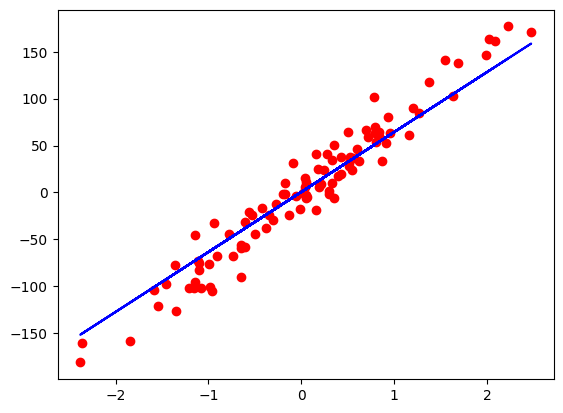

In [108]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# **Logistic Regression**

In [109]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [110]:
# Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [111]:
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [112]:
# Model
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

In [113]:
# Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [114]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.5866
epoch: 20, loss = 0.4708
epoch: 30, loss = 0.4006
epoch: 40, loss = 0.3536
epoch: 50, loss = 0.3197
epoch: 60, loss = 0.2941
epoch: 70, loss = 0.2740
epoch: 80, loss = 0.2576
epoch: 90, loss = 0.2439
epoch: 100, loss = 0.2324
accuracy: 0.9211


# **Dataloader**

In [115]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


In [130]:
class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('./sample_data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [131]:
# create dataset
dataset = WineDataset()

In [132]:
# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [133]:
# Load whole dataset with DataLoader
train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)

In [134]:
# convert to an iterator and look at one random sample
dataiter = iter(train_loader)
data = next(dataiter)
features, labels = data
print(features, labels)

tensor([[1.4750e+01, 1.7300e+00, 2.3900e+00, 1.1400e+01, 9.1000e+01, 3.1000e+00,
         3.6900e+00, 4.3000e-01, 2.8100e+00, 5.4000e+00, 1.2500e+00, 2.7300e+00,
         1.1500e+03],
        [1.2850e+01, 1.6000e+00, 2.5200e+00, 1.7800e+01, 9.5000e+01, 2.4800e+00,
         2.3700e+00, 2.6000e-01, 1.4600e+00, 3.9300e+00, 1.0900e+00, 3.6300e+00,
         1.0150e+03],
        [1.1840e+01, 8.9000e-01, 2.5800e+00, 1.8000e+01, 9.4000e+01, 2.2000e+00,
         2.2100e+00, 2.2000e-01, 2.3500e+00, 3.0500e+00, 7.9000e-01, 3.0800e+00,
         5.2000e+02],
        [1.4210e+01, 4.0400e+00, 2.4400e+00, 1.8900e+01, 1.1100e+02, 2.8500e+00,
         2.6500e+00, 3.0000e-01, 1.2500e+00, 5.2400e+00, 8.7000e-01, 3.3300e+00,
         1.0800e+03]]) tensor([[1.],
        [1.],
        [2.],
        [1.]])


In [136]:
# Dummy Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):

        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

178 45
Epoch: 1/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 25/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 35/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 45/45| Inputs torch.Size([2, 13]) | Labels torch.Size([2, 1])
Epoch: 2/2, Step 5/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 15/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 20/45| Inputs torch.Size([4, 1

In [137]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

train_loader = DataLoader(dataset=train_dataset,
                                           batch_size=3,
                                           shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 72211521.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28556269.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21544228.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12691891.25it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [138]:
# look at one random sample
dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)

torch.Size([3, 1, 28, 28]) torch.Size([3])


# **Transformers**

In [139]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np


In [141]:
class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('./sample_data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

In [142]:
#Custom Transforms
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

In [143]:
print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]


In [145]:
print('With Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)


With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [146]:
print('With Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])


# **Softmax and Crossentropy**

In [147]:
import torch
import torch.nn as nn
import numpy as np


In [148]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])


In [149]:
# Cross entropy
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])


In [150]:
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In [151]:
# CrossEntropyLoss in PyTorch (applies Softmax)
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])

Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406


In [152]:
# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')

Actual class: 0, Y_pred1: 0, Y_pred2: 1


In [153]:
# allows batch loss for multiple samples
Y = torch.tensor([2, 0, 1])

Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

Batch Loss1:  0.2834
Batch Loss2: 1.6418


In [154]:
# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


In [155]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

In [156]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

# **Activation Functions**

In [157]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [158]:
x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])


In [159]:
# sigmoid
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])


In [160]:
#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])


In [161]:
# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])


In [162]:
# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)

tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


In [163]:
#nn.ReLU() creates an nn.Module which you can add e.g. to an nn.Sequential model.
# option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

In [164]:
# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

# **Plot Activations**

In [165]:
import numpy as np
import matplotlib.pyplot as plt

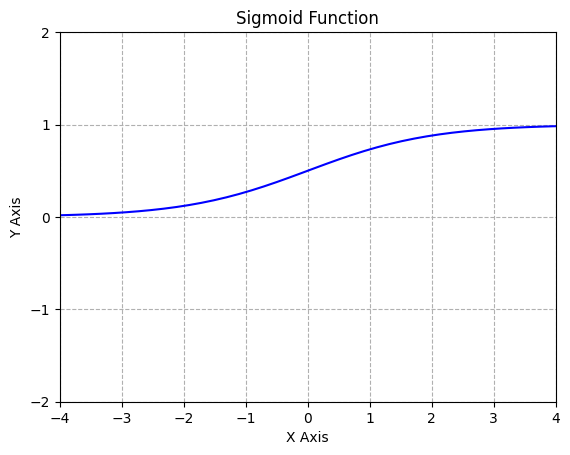

<Figure size 640x480 with 0 Axes>

In [166]:
# Sigmoid
sigmoid = lambda x: 1 / (1 + np.exp(-x))

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

fig = plt.figure()
plt.plot(y,sigmoid(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Sigmoid Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('sigmoid.png')

fig = plt.figure()

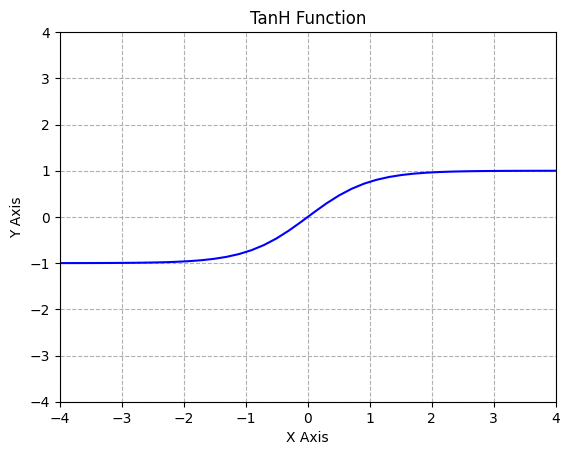

<Figure size 640x480 with 0 Axes>

In [167]:
# TanH
tanh = lambda x: 2*sigmoid(2*x)-1

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,100)

plt.plot(y,tanh(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('TanH Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('tanh.png')

fig = plt.figure()

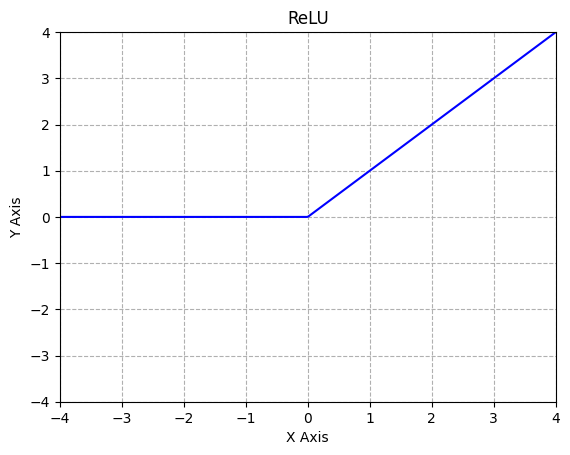

<Figure size 640x480 with 0 Axes>

In [168]:
# ReLU
relu = lambda x: np.where(x>=0, x, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,relu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('relu.png')

fig = plt.figure()

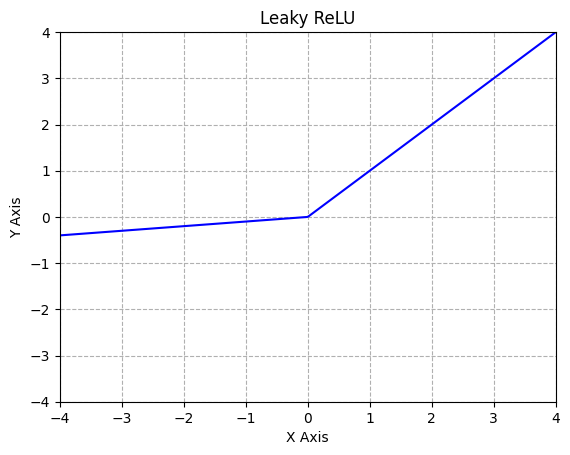

<Figure size 640x480 with 0 Axes>

In [169]:
# Leaky ReLU
leakyrelu = lambda x: np.where(x>=0, x, 0.1*x)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,leakyrelu(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Leaky ReLU')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])

plt.ylim(-4, 4)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('lrelu.png')

fig = plt.figure()



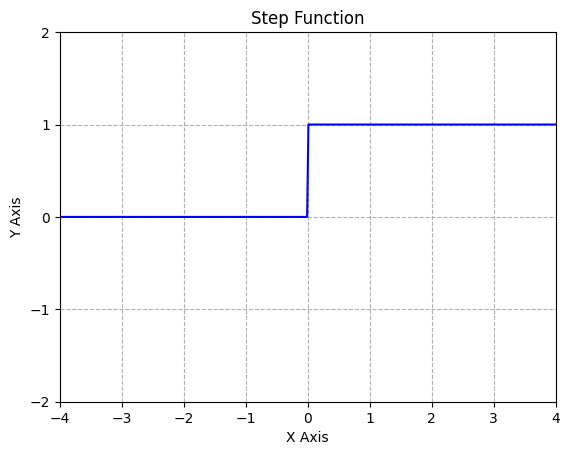

done


In [170]:
# Binary Step
bstep = lambda x: np.where(x>=0, 1, 0)

x=np.linspace(-10,10,10)

y=np.linspace(-10,10,1000)

plt.plot(y,bstep(y),'b', label='linspace(-10,10,100)')

plt.grid(linestyle='--')

plt.xlabel('X Axis')

plt.ylabel('Y Axis')

plt.title('Step Function')

plt.xticks([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.yticks([-2, -1, 0, 1, 2])

plt.ylim(-2, 2)
plt.xlim(-4, 4)

plt.show()
#plt.savefig('step.png')

print('done')

# **Feedforward**

In [171]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [173]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [174]:
# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [175]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

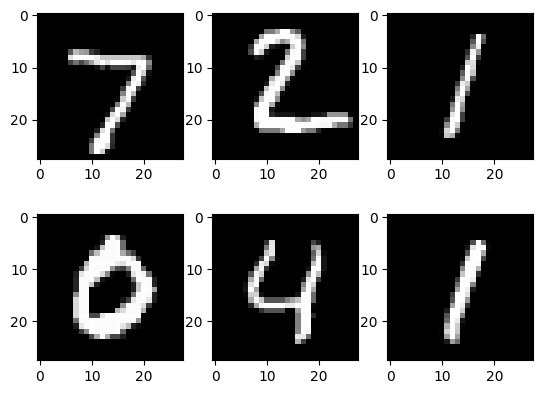

In [176]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [177]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [178]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [179]:
# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/2], Step [100/600], Loss: 0.3387
Epoch [1/2], Step [200/600], Loss: 0.3014
Epoch [1/2], Step [300/600], Loss: 0.2307
Epoch [1/2], Step [400/600], Loss: 0.3220
Epoch [1/2], Step [500/600], Loss: 0.2640
Epoch [1/2], Step [600/600], Loss: 0.1377
Epoch [2/2], Step [100/600], Loss: 0.0395
Epoch [2/2], Step [200/600], Loss: 0.0861
Epoch [2/2], Step [300/600], Loss: 0.0943
Epoch [2/2], Step [400/600], Loss: 0.1462
Epoch [2/2], Step [500/600], Loss: 0.1280
Epoch [2/2], Step [600/600], Loss: 0.0441


In [180]:
# Test the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.09 %


# **CNN**

In [181]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [182]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [183]:
# Hyper-parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.001


In [184]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [185]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


100%|██████████| 170498071/170498071 [00:10<00:00, 15895410.59it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [186]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)


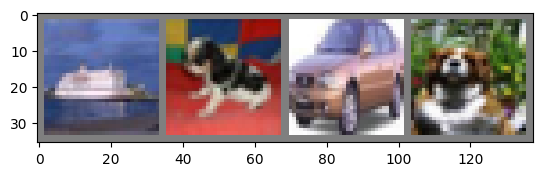

In [187]:
# show images
imshow(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)


In [188]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/5], Step [2000/12500], Loss: 2.3054
Epoch [1/5], Step [4000/12500], Loss: 2.2784
Epoch [1/5], Step [6000/12500], Loss: 2.2724
Epoch [1/5], Step [8000/12500], Loss: 2.1750
Epoch [1/5], Step [10000/12500], Loss: 2.4958
Epoch [1/5], Step [12000/12500], Loss: 2.9613
Epoch [2/5], Step [2000/12500], Loss: 2.0349
Epoch [2/5], Step [4000/12500], Loss: 1.8137
Epoch [2/5], Step [6000/12500], Loss: 1.6242
Epoch [2/5], Step [8000/12500], Loss: 2.1427
Epoch [2/5], Step [10000/12500], Loss: 0.9235
Epoch [2/5], Step [12000/12500], Loss: 2.0410
Epoch [3/5], Step [2000/12500], Loss: 2.3803
Epoch [3/5], Step [4000/12500], Loss: 2.7230
Epoch [3/5], Step [6000/12500], Loss: 1.4946
Epoch [3/5], Step [8000/12500], Loss: 1.6640
Epoch [3/5], Step [10000/12500], Loss: 1.7741
Epoch [3/5], Step [12000/12500], Loss: 1.5925
Epoch [4/5], Step [2000/12500], Loss: 1.5556
Epoch [4/5], Step [4000/12500], Loss: 1.2626
Epoch [4/5], Step [6000/12500], Loss: 1.8052
Epoch [4/5], Step [8000/12500], Loss: 0.6810
Epoc

In [189]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 49.38 %
Accuracy of plane: 65.6 %
Accuracy of car: 68.4 %
Accuracy of bird: 29.5 %
Accuracy of cat: 26.9 %
Accuracy of deer: 55.3 %
Accuracy of dog: 38.3 %
Accuracy of frog: 57.8 %
Accuracy of horse: 52.1 %
Accuracy of ship: 54.5 %
Accuracy of truck: 45.4 %


# **Transfer Learning**

In [190]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [192]:
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

In [195]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [199]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = './gdrive/MyDrive/content/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)


['ants', 'bees']


In [200]:
def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()

In [201]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

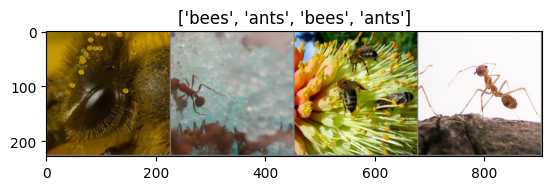

In [202]:
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [203]:
# Finetuning the convnet

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 200MB/s]


In [204]:
# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [205]:
# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6327 Acc: 0.6393
val Loss: 0.4705 Acc: 0.8105

Epoch 1/24
----------
train Loss: 0.4868 Acc: 0.8115
val Loss: 0.3442 Acc: 0.8889

Epoch 2/24
----------
train Loss: 0.4422 Acc: 0.8074
val Loss: 0.2916 Acc: 0.9085

Epoch 3/24
----------
train Loss: 0.4002 Acc: 0.8402
val Loss: 0.2758 Acc: 0.9085

Epoch 4/24
----------
train Loss: 0.4062 Acc: 0.8320
val Loss: 0.2279 Acc: 0.9346

Epoch 5/24
----------
train Loss: 0.3963 Acc: 0.8238
val Loss: 0.2251 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.3347 Acc: 0.8607
val Loss: 0.2294 Acc: 0.9216

Epoch 7/24
----------
train Loss: 0.3952 Acc: 0.8156
val Loss: 0.2138 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.3198 Acc: 0.8893
val Loss: 0.2065 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.3771 Acc: 0.8115
val Loss: 0.2030 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.3497 Acc: 0.8525
val Loss: 0.2188 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.3606 Acc: 0.8402
val Loss: 0.2049 Acc: 0.9412

Ep

In [206]:
# ConvNet as fixed feature extractor
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False


In [207]:
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()


In [208]:
# Observe that only parameters of final layer are being optimized as
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)


In [209]:
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5002 Acc: 0.7254
val Loss: 0.7150 Acc: 0.6732

Epoch 1/24
----------
train Loss: 0.7154 Acc: 0.6803
val Loss: 0.1761 Acc: 0.9542

Epoch 2/24
----------
train Loss: 0.4260 Acc: 0.8156
val Loss: 0.2116 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.4016 Acc: 0.8238
val Loss: 0.3305 Acc: 0.8758

Epoch 4/24
----------
train Loss: 0.4465 Acc: 0.7951
val Loss: 0.2378 Acc: 0.9281

Epoch 5/24
----------
train Loss: 0.5030 Acc: 0.7910
val Loss: 0.1944 Acc: 0.9542

Epoch 6/24
----------
train Loss: 0.3602 Acc: 0.8443
val Loss: 0.1887 Acc: 0.9412

Epoch 7/24
----------
train Loss: 0.3908 Acc: 0.8320
val Loss: 0.1974 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.3977 Acc: 0.8238
val Loss: 0.1873 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.3092 Acc: 0.8689
val Loss: 0.1940 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.3608 Acc: 0.8361
val Loss: 0.2128 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3096 Acc: 0.8648
val Loss: 0.1954 Acc: 0.9477

Ep

# **Tensorboard**

In [210]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

In [211]:
writer = SummaryWriter('runs/mnist1')

In [212]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [213]:
# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

In [214]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

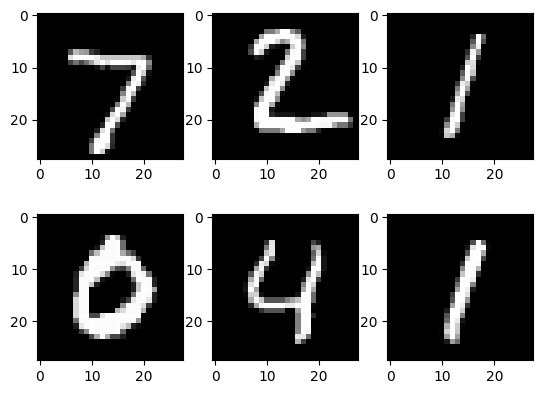

In [216]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()
############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()


In [217]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


In [218]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28).to(device))
#writer.close()
#sys.exit()

In [219]:
# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0

Epoch [1/1], Step [100/938], Loss: 0.1687
Epoch [1/1], Step [200/938], Loss: 0.4621
Epoch [1/1], Step [300/938], Loss: 0.2964
Epoch [1/1], Step [400/938], Loss: 0.1708
Epoch [1/1], Step [500/938], Loss: 0.0499
Epoch [1/1], Step [600/938], Loss: 0.2101
Epoch [1/1], Step [700/938], Loss: 0.1465
Epoch [1/1], Step [800/938], Loss: 0.2053
Epoch [1/1], Step [900/938], Loss: 0.1655


In [223]:
# Test the model
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(labels)

    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()

Accuracy of the network on the 10000 test images: 95.99 %


# **Save Load**

In [224]:
import torch
import torch.nn as nn

In [225]:
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)

In [226]:
# train your model...

for param in model.parameters():
    print(param)


Parameter containing:
tensor([[-0.4039,  0.0323,  0.0801, -0.1325,  0.1612, -0.3546]],
       requires_grad=True)
Parameter containing:
tensor([-0.0874], requires_grad=True)


In [227]:
# save and load entire model

FILE = "model.pth"
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)


Parameter containing:
tensor([[-0.4039,  0.0323,  0.0801, -0.1325,  0.1612, -0.3546]],
       requires_grad=True)
Parameter containing:
tensor([-0.0874], requires_grad=True)


In [228]:
# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict())
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()

print(loaded_model.state_dict())


OrderedDict([('linear.weight', tensor([[-0.4039,  0.0323,  0.0801, -0.1325,  0.1612, -0.3546]])), ('linear.bias', tensor([-0.0874]))])
OrderedDict([('linear.weight', tensor([[-0.4039,  0.0323,  0.0801, -0.1325,  0.1612, -0.3546]])), ('linear.bias', tensor([-0.0874]))])


In [229]:
#load checkpoint
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval()

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}


Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)

In [230]:
print(optimizer.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}
